In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from europePMC_wrapper import *
import pandas as pd
import pickle
import json

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

import scispacy
import spacy 


nlp_bc5cdr = spacy.load("en_ner_bc5cdr_md")

nlp_bionlp13cg = spacy.load("en_ner_bionlp13cg_md")

from typing import List


# Extraction of articles with keywords

In [234]:
papers_mtb = pmc_to_papers('Mycobacterium tuberculosis')

getting papers


In [156]:
papers_tuberculosis = pmc_to_papers('tuberculosis')

getting papers


In [153]:
papers_mtb = get_annotations_paper_instances(papers_mtb)
with open ('papers_mtb_annotated.pkl', 'wb') as f:
    pickle.dump(papers_mtb, f)

Retrieved: 8426/8426 papers | Duration: 70.42 seconds


In [157]:
papers_tuberculosis = get_annotations_paper_instances(papers_tuberculosis)
with open ('tb_papers_annotated.pkl', 'wb') as f:
    pickle.dump(papers_tuberculosis, f)    

Retrieved: 14168/14168 papers | Duration: 118.11 seconds


In [158]:
len(papers_tuberculosis)

14168

In [220]:
len(papers_mtb)

8426

## Annotations

In [26]:
with open('papers_mtb_annotated.pkl', 'rb') as file:
    papers_mtb = pickle.load(file)


In [12]:
with open('tb_papers_annotated.pkl', 'rb') as file:
    papers_tb = pickle.load(file)

In [ ]:
papers_mtb

In [ ]:
papers_tb

# scispaCy annotations


Aplication of the models __doc_bionlp13cg__ and __doc_bc5cdr__ :

In [183]:
def process_paper_instances(paper_instances:List[Paper], target_id:str=None)->List[Paper]:
    """
    Process a list of Paper instances by performing annotation retrieval using scispaCy models.

    Args:
        paper_instances (list): A list of Paper instances to process.
        target_id (str, optional): The target ID to filter the processing for a specific paper. Defaults to None.

    Returns:
        list: A list of annotated Paper instances with updated annotations.

    """
    annotated_papers = []

    for i, paper in enumerate(paper_instances):
            print(f'{i+1} annotated in {len(paper_instances)} papers', end='\r')
            if target_id != None:
                if paper.id != target_id:
                    continue
            doc_bionlp13cg = nlp_bionlp13cg(paper.title_abstract)
            doc_bc5cdr = nlp_bc5cdr(paper.title_abstract)

                
            for exact in doc_bionlp13cg.ents:
                
                if exact.label_ == 'GENE_OR_GENE_PRODUCT':
                    if exact.text.lower().rstrip() not in paper.annotations_scispacy['Gene_Proteins']:
                        paper.annotations_scispacy['Gene_Proteins'].append(exact.text.lower().rstrip())
                        
                elif exact.label_ == 'ORGANISM':
                    if exact.text.lower().rstrip() not in paper.annotations_scispacy['Organisms']:
                        paper.annotations_scispacy['Organisms'].append(exact.text.lower().rstrip())
                        
                elif exact.label_ == 'SIMPLE_CHEMICAL':
                    if exact.text.lower().rstrip() not in paper.annotations_scispacy['Chemicals']:
                        paper.annotations_scispacy['Chemicals'].append(exact.text.lower().rstrip())
                        


            for exact in doc_bc5cdr.ents:
                
                if exact.label_ == 'CHEMICAL':
                    if exact.text.lower().rstrip() not in paper.annotations_scispacy['Chemicals']:
                        paper.annotations_scispacy['Chemicals'].append(exact.text.lower().rstrip())        
                elif exact.label_ == 'DISEASE':
                    if exact.text not in paper.annotations_scispacy['Diseases']:
                        paper.annotations_scispacy['Diseases'].append(exact.text)

            annotated_papers.append(paper)
        


    return annotated_papers


Performing scispacy for every article:

In [177]:
mtb_scispacy = process_paper_instances(papers_mtb)

In [15]:
tb_scispacy=process_paper_instances(papers_tb)

# Checking known targets contained in the papers to see the performance of  each method:

In [6]:
def papers_containing_terms_list(paper_instances:List[Paper], list_terms:List[str])->List[Paper]:
    """
    Filter a list of Paper instances based on whether their title or abstract contains any of the specified terms.

    Args:
        paper_instances (list): A list of Paper instances to filter.
        list_terms (list): A list of terms to check for in the title or abstract.

    Returns:
        list: A list of Paper instances that contain any of the specified terms in their title or abstract.

    """
    papers_containing_terms = []
    for paper in paper_instances:
        for term in list_terms:
            if term in paper.title_abstract:
                papers_containing_terms.append(paper)
                break
    return papers_containing_terms


__Defensin alpha 3 effector molecule (DEFA3)__:

In [178]:
mtbdefa3=papers_containing_terms_list(mtb_scispacy, list_terms=['Defensin alpha 3 effector molecule', 'DEFA3'])

In [179]:
mtbdefa3[0].annotations

{'Diseases': ['tuberculosis',
  'acquired immune deficiency syndrome',
  'immunodeficiency',
  'co-infection',
  'infection'],
 'Chemicals': [],
 'Gene_Proteins': ['ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1'],
 'Organisms': ['hiv', 'mycobacterium tuberculosis', 'human']}

In [128]:
mtbdefa3[0].annotations_scispacy

{'Diseases': ['TB',
  'immune deficiency syndrome',
  'deaths',
  'Mycobacterium tuberculosis',
  'human immunodeficiency virus (HIV) co-infection.<h4>Materials and methods</h4>We selected 113 HIV/TB',
  'TB infection',
  'HIV/TB'],
 'Chemicals': ['mtb', 'gse37250'],
 'Gene_Proteins': ['(aids)-related',
  'methods</h4>we',
  'gse69581',
  '(string).<h4>results</h4>a',
  'camp',
  'ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1).<h4>conclusions</h4>twelve'],
 'Organisms': ['human immunodeficiency virus']}

In [129]:
tbdefa3=papers_containing_terms_list(tb_scispacy, list_terms=['Defensin alpha 3 effector molecule', 'DEFA3'])

In [130]:
tbdefa3[0].annotations

{'Diseases': ['tuberculosis',
  'acquired immune deficiency syndrome',
  'immunodeficiency',
  'co-infection',
  'infection'],
 'Chemicals': [],
 'Gene_Proteins': ['ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1'],
 'Organisms': ['hiv', 'mycobacterium tuberculosis', 'human']}

In [131]:
tbdefa3[0].annotations_scispacy

{'Diseases': ['TB',
  'immune deficiency syndrome',
  'deaths',
  'Mycobacterium tuberculosis',
  'human immunodeficiency virus (HIV) co-infection.<h4>Materials and methods</h4>We selected 113 HIV/TB',
  'TB infection',
  'HIV/TB'],
 'Chemicals': ['mtb'],
 'Gene_Proteins': ['(aids)-related',
  'methods</h4>we',
  'gse69581',
  '(string).<h4>results</h4>a',
  'camp',
  'ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1).<h4>conclusions</h4>twelve'],
 'Organisms': ['human immunodeficiency virus']}

__Protein phosphatase 2 phosphatase activator (PtpA)__

In [119]:
mtb_PtpA = papers_containing_terms_list(mtb_scispacy, list_terms=['Protein phosphatase 2 phosphatase activator', 'PtpA'])

In [120]:
mtb_PtpA[0].id

'36932056'

In [121]:
mtb_PtpA[0].annotations

{'Diseases': ['tuberculosis'],
 'Chemicals': ['lipid', 'iron'],
 'Gene_Proteins': ['phosphatase',
  'cys11',
  'histone h3',
  'prmt6',
  'glutathione peroxidase 4',
  'gpx4'],
 'Organisms': ['mycobacterium tuberculosis']}

In [122]:
mtb_PtpA[0].annotations_scispacy

{'Diseases': ['death',
  'tuberculosis',
  'Mycobacterium tuberculosis',
  'ferroptosis',
  'TB'],
 'Chemicals': ['tyrosine', 'arginine', 'glutathione', 'iron-dependent'],
 'Gene_Proteins': ['protein tyrosine phosphatase a',
  'ptpa',
  'rangdp',
  'histone h3 arginine 2',
  'h3r2me2a',
  'prmt6',
  'glutathione peroxidase 4',
  'gpx4',
  'gpx4-dependent'],
 'Organisms': ['mtb ptpa-host prmt6']}

In [106]:
tb_PtpA = papers_containing_terms_list(tb_scispacy, list_terms=['Protein phosphatase 2 phosphatase activator', 'PtpA'])

In [107]:
tb_PtpA[0].annotations

{'Diseases': ['tuberculosis'],
 'Chemicals': ['lipid', 'iron'],
 'Gene_Proteins': ['phosphatase',
  'cys11',
  'histone h3',
  'prmt6',
  'glutathione peroxidase 4',
  'gpx4'],
 'Organisms': ['mycobacterium tuberculosis']}

In [22]:
tb_PtpA[0].annotations_scispacy

{'Diseases': ['death',
  'tuberculosis',
  'Mycobacterium tuberculosis',
  'ferroptosis',
  'TB'],
 'Chemicals': ['tyrosine', 'arginine', 'glutathione'],
 'Gene_Proteins': ['protein tyrosine phosphatase a',
  'ptpa',
  'rangdp',
  'histone h3 arginine 2',
  'h3r2me2a',
  'prmt6',
  'glutathione peroxidase 4',
  'gpx4',
  'gpx4-dependent'],
 'Organisms': ['mtb ptpa-host prmt6']}

__Target: cathepsin G (CTSG)__

In [123]:
mtb_CTSG = papers_containing_terms_list(mtb_scispacy, list_terms=['CTSG', 'cathepsin G'])

In [124]:
mtb_CTSG[0].id

'33067206'

In [125]:
mtb_CTSG[0].annotations

{'Diseases': ['tuberculosis',
  'acquired immune deficiency syndrome',
  'immunodeficiency',
  'co-infection',
  'infection'],
 'Chemicals': [],
 'Gene_Proteins': ['ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1'],
 'Organisms': ['hiv', 'mycobacterium tuberculosis', 'human']}

In [16]:
tb_CTSG = papers_containing_terms_list(tb_scispacy, list_terms=['CTSG', 'cathepsin G'])

In [238]:
mtb_CTSG[0].annotations_scispacy

{'Diseases': ['TB',
  'immune deficiency syndrome',
  'deaths',
  'Mycobacterium tuberculosis',
  'human immunodeficiency virus (HIV) co-infection.<h4>Materials and methods</h4>We selected 113 HIV/TB',
  'TB infection',
  'HIV/TB'],
 'Chemicals': ['mtb'],
 'Gene_Proteins': ['(aids)-related',
  'methods</h4>we',
  'gse69581',
  '(string).<h4>results</h4>a',
  'camp',
  'ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1).<h4>conclusions</h4>twelve'],
 'Organisms': ['human immunodeficiency virus']}

In [108]:
tb_CTSG = papers_containing_terms_list(tb_scispacy, list_terms=['CTSG', 'cathepsin G'])

In [109]:
tb_CTSG[0].annotations

{'Diseases': ['silicosis', 'tuberculosis', 'lung cancer'],
 'Chemicals': ['apolipoprotein'],
 'Gene_Proteins': ['granzyme a', 'cathepsin g', 'interferon-β', 'ifn-β'],
 'Organisms': []}

In [110]:
tb_CTSG[0].annotations_scispacy

{'Diseases': ['silicosis', 'tuberculosis', 'lung cancer'],
 'Chemicals': [],
 'Gene_Proteins': ['granzyme a',
  'cathepsin g',
  'apolipoprotein a',
  'interferon-β (',
  'assay.<h4>results</h4>the',
  'µg/ml',
  'ifn-β'],
 'Organisms': ['patients']}

Target: Enoyl-[acyl-carrier-protein] reductase  (ENR) or (inhA)

In [67]:
mtb_inhA = papers_containing_terms_list(mtb_scispacy, list_terms=['inhA', 'Enoyl-[acyl-carrier-protein] reductase G'])

In [68]:
mtb_inhA[0].annotations

{'Diseases': [],
 'Chemicals': ['isoniazid'],
 'Gene_Proteins': ['katg', 'inha', 'ahpc', 'dst'],
 'Organisms': ['mycobacterium tuberculosis']}

In [69]:
mtb_inhA[0].annotations_scispacy

{'Diseases': ['Isoniazid-Heteroresistant Mycobacterium tuberculosis',
  'Mycobacterium tuberculosis'],
 'Chemicals': ['mtb', 'isoniazid'],
 'Gene_Proteins': ['pcr.the', 's315', 'b', 'inha</i', 'c', 'ahpc</i'],
 'Organisms': ['patients']}

In [74]:
tb_inhA = papers_containing_terms_list(tb_scispacy, list_terms=['inhA', 'Enoyl-[acyl-carrier-protein] reductase G'])

In [75]:
tb_inhA[0].annotations

{'Diseases': ['multidrug-resistant tuberculosis', 'cross-resistance'],
 'Chemicals': ['isoniazid', 'ethionamide'],
 'Gene_Proteins': ['dst',
  'katg',
  'inha',
  'ahpc',
  'ndh',
  'msha',
  'etha',
  'ethr'],
 'Organisms': ['mycobacterium tuberculosis', 'm. tuberculosis']}

In [76]:
tb_inhA[0].annotations_scispacy

{'Diseases': ['multidrug-resistant tuberculosis', 'MDR'],
 'Chemicals': ['isoniazid',
  'ethionamide',
  'mycobacterium',
  'eth',
  'inh',
  'inh-resistant',
  'co-resistant'],
 'Gene_Proteins': ['co-resistance',
  'china.<h4>background</h4>ethionamide',
  'inha',
  'inh-',
  'eth-resistance',
  'inh-eth',
  'katg</i',
  'inha</i',
  'ahpc</i',
  'msha</i',
  'etha</i',
  'ethr</i',
  'ndh',
  'promoter+<i'],
 'Organisms': []}

__Target: RNA polymerase__

In [201]:
mtb_rnapl = papers_containing_terms_list(mtb_scispacy, list_terms=['RNA polymerase','RNAP'])

In [213]:
mtb_rnapl[0].annotations

{'Diseases': ['tuberculosis', 'drug-resistant tuberculosis'],
 'Chemicals': [],
 'Gene_Proteins': ['rpob', 'gyra', 'gyrb', 'mic'],
 'Organisms': ['mycobacterium tuberculosis',
  'piper longum',
  'cressa cretica',
  'p. longum',
  'c. cretica']}

In [210]:
mtb_rnapl[0].annotations_scispacy

{'Diseases': ['Mycobacterium tuberculosis', 'Tuberculosis', 'tuberculosis'],
 'Chemicals': ['front-line', 'anti-mycobacterial agents'],
 'Gene_Proteins': ['dna gyrase',
  'h4>background',
  '/h4',
  'h4>method',
  '2-∆∆ct',
  'rpob',
  'gyrb',
  'h4>results',
  'µg/ml',
  '250µg/ml',
  'h4>conclusions',
  'gyra was 2',
  'gyrb.'],
 'Organisms': ['cretica', 'crude extracts', 'c. cretica']}

In [204]:
tb_rnapl = papers_containing_terms_list(tb_scispacy, list_terms=['RNA polymerase','RNAP'])

In [208]:
tb_rnapl[110].annotations

{'Diseases': ['mycobacteriosis'],
 'Chemicals': ['isoniazid', 'rifampicin'],
 'Gene_Proteins': ['mtd', 'catalase-peroxidase', 'rpob'],
 'Organisms': ['mycobacteria',
  'mycobacterium tuberculosis',
  'm. tuberculosis']}

In [207]:
tb_rnapl[110].annotations_scispacy

{'Diseases': ['mycobacteriosis', 'Mycobacterium tuberculosis', 'tuberculosis'],
 'Chemicals': ['isoniazid', 'rifampicin', 'non-radioisotope'],
 'Gene_Proteins': ['mycobacteriosis]the',
  'hpa',
  'pab',
  'mac',
  'catalase-peroxidase',
  'rna polymerase beta subunit',
  'analysis.(abstract truncated at'],
 'Organisms': []}

__Traget: Arabinosyltransferase (EmbA)__

In [40]:
mtb_emba = papers_containing_terms_list(mtb_scispacy, list_terms=['Arabinosyltransferase', 'EmbA'])

In [41]:
mtb_emba[0].id

'32090179'

In [110]:
mtb_emba[0].annotations

{'Diseases': ['tuberculosis'],
 'Chemicals': ['ethambutol', 'isoniazid'],
 'Gene_Proteins': ['emb5'],
 'Organisms': ['mycobacterium tuberculosis']}

In [111]:
mtb_emba[0].annotations_scispacy

{'Diseases': ['Mycobacterium tuberculosis', 'tuberculosis', 'TB'],
 'Chemicals': ['ethambutol', 'isoniazid'],
 'Gene_Proteins': ['arabinosyltransferase c',
  'emb1',
  'emb2',
  'emb3',
  'emb4',
  'emb5'],
 'Organisms': ['m.tb']}

In [112]:
tb_emba = papers_containing_terms_list(tb_scispacy, list_terms=['Arabinosyltransferase', 'EmbA'])

In [113]:
tb_emba[0].annotations

{'Diseases': ['tuberculosis'],
 'Chemicals': ['ethambutol'],
 'Gene_Proteins': [],
 'Organisms': ['mycobacterium tuberculosis']}

In [115]:
tb_emba[0].annotations_scispacy

{'Diseases': [],
 'Chemicals': ['ethambutol', 'mycobacterium'],
 'Gene_Proteins': ['embb',
  'embc',
  'embc-embc',
  'embc.',
  'arabinosyltransferases'],
 'Organisms': []}

__Target: catalase-peroxidase (KatG)__

In [111]:
mtb_katg = papers_containing_terms_list(mtb_scispacy, list_terms=['catalase-peroxidase', 'KatG'])

In [112]:
mtb_katg[0].id

'PPR614112'

In [113]:
mtb_katg[0].annotations

{'Diseases': ['infections', 'infection'],
 'Chemicals': ['isoniazid'],
 'Gene_Proteins': ['mtb', 'katg'],
 'Organisms': ['mycobacterium tuberculosis']}

In [114]:
mtb_katg[0].annotations_scispacy

{'Diseases': ['Mycobacterium tuberculosis',
  'infections',
  're-sensitizes',
  'toxicity',
  'infection'],
 'Chemicals': ['isoniazid',
  'mycobacterium',
  'inh',
  'inh-resistant',
  'inh-nad',
  'sub-lethal'],
 'Gene_Proteins': ['inha',
  'inh',
  'inha.',
  'c10 re-sensitizes inh-resistant katg -hypomorphs'],
 'Organisms': ['mtb']}

In [115]:
tb_katg = papers_containing_terms_list(tb_scispacy, list_terms=['catalase-peroxidase', 'KatG']) 

In [130]:
tb_katg[0].id

'36547804'

note: In the paper it is mentioned, but here the methods could't identify

In [116]:
tb_katg[0].annotations 

{'Diseases': ['tuberculosis', 'infection'],
 'Chemicals': ['lipids', 'pantothenate', 'amino'],
 'Gene_Proteins': ['mmpl3',
  'mmaa4',
  'cmaa1',
  'cmaa2',
  'isocitrate lyases',
  'lat',
  'transcriptional regulator',
  'glutamine synthetase',
  'glna1',
  'mtb'],
 'Organisms': ['mycobacterium tuberculosis', 'mycobacteria']}

In [131]:
tb_katg[0].annotations_scispacy

{'Diseases': ['Mycobacterium tuberculosis',
  'tuberculosis',
  'TB',
  'fatty acid',
  'ICLs',
  'TB infection'],
 'Chemicals': ['nucleotide',
  'isocitrate',
  'pantothenate',
  'phop',
  'glutamine'],
 'Gene_Proteins': ['inha',
  'pcaa',
  'cmaa2',
  'isocitrate lyases',
  'pantothenate synthase',
  'lysine-ε amino transferase',
  'lat',
  'leud',
  'ider',
  'rv1098c',
  'pyrg.',
  'phop'],
 'Organisms': ['latently']}

__Defensin alpha 3 effector molecule (DEFA3)__:

In [45]:
mtb_defa3 = papers_containing_terms_list(mtb_scispacy, list_terms=['Defensin alpha 3 effector molecule', 'DEFA3'])

In [47]:
mtb_defa3[0].annotations

{'Diseases': ['tuberculosis',
  'acquired immune deficiency syndrome',
  'immunodeficiency',
  'co-infection',
  'infection'],
 'Chemicals': [],
 'Gene_Proteins': ['ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1'],
 'Organisms': ['hiv', 'mycobacterium tuberculosis', 'human']}

In [49]:
mtb_defa3[0].annotations_scispacy

{'Diseases': ['TB',
  'immune deficiency syndrome',
  'deaths',
  'Mycobacterium tuberculosis',
  'human immunodeficiency virus (HIV) co-infection.<h4>Materials and methods</h4>We selected 113 HIV/TB',
  'TB infection',
  'HIV/TB'],
 'Chemicals': ['mtb'],
 'Gene_Proteins': ['(aids)-related',
  'methods</h4>we',
  'gse69581',
  '(string).<h4>results</h4>a',
  'camp',
  'ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1).<h4>conclusions</h4>twelve'],
 'Organisms': ['human immunodeficiency virus']}

In [46]:
tb_defa3 = papers_containing_terms_list(tb_scispacy, list_terms=['Defensin alpha 3 effector molecule', 'DEFA3'])

In [51]:
mtb_defa3[0].annotations

{'Diseases': ['tuberculosis',
  'acquired immune deficiency syndrome',
  'immunodeficiency',
  'co-infection',
  'infection'],
 'Chemicals': [],
 'Gene_Proteins': ['ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1'],
 'Organisms': ['hiv', 'mycobacterium tuberculosis', 'human']}

In [50]:
mtb_defa3[0].annotations_scispacy

{'Diseases': ['TB',
  'immune deficiency syndrome',
  'deaths',
  'Mycobacterium tuberculosis',
  'human immunodeficiency virus (HIV) co-infection.<h4>Materials and methods</h4>We selected 113 HIV/TB',
  'TB infection',
  'HIV/TB'],
 'Chemicals': ['mtb'],
 'Gene_Proteins': ['(aids)-related',
  'methods</h4>we',
  'gse69581',
  '(string).<h4>results</h4>a',
  'camp',
  'ctsg',
  'defa1',
  'defa1b',
  'defa3',
  'defa4',
  'elane',
  'hpse',
  'olfm4',
  'pglyrp1',
  'tcn1).<h4>conclusions</h4>twelve'],
 'Organisms': ['human immunodeficiency virus']}

# Comparisson of results :

In [86]:
print(f"Title: {mtb_scispacy[0].title}")
print("\n")
print(f"Scispacy: {mtb_scispacy[0].annotations_scispacy}")
print("\n")
print(f"Annotations: {mtb_scispacy[0].annotations}")
print("\n")
print(f"Differences: {mtb_scispacy[0].compare_annotations()}")

Title: Inoculum-dependent bactericidal activity of a <i>Mycobacterium tuberculosis</i> MmpL3 inhibitor.


Scispacy: {'Diseases': [], 'Chemicals': ['mycobacterium', 'trehalose monomycolate', 'isoniazid', 'mycolate'], 'Gene_Proteins': ['trehalose monomycolate', 'cell-wall', 'nitd-349'], 'Organisms': []}


Annotations: {'Diseases': [], 'Chemicals': ['trehalose monomycolate', 'isoniazid', 'mycolate'], 'Gene_Proteins': ['mmpl3'], 'Organisms': ['mycobacterium tuberculosis']}


Annotations for 'Diseases' are the same.
Different annotations for 'Chemicals': {'mycobacterium'}
Different annotations for 'Gene_Proteins': {'trehalose monomycolate', 'cell-wall', 'nitd-349', 'mmpl3'}
Different annotations for 'Organisms': {'mycobacterium tuberculosis'}
Differences: None


In [70]:
print(mtb_scispacy[10].title)
print(mtb_scispacy[10].annotations_scispacy)
print(mtb_scispacy[10].annotations)
print(mtb_scispacy[10].compare_annotations())

<em>Mycobacterium tuberculosis</em> in a Trap: The Role of Neutrophil Extracellular Traps in Tuberculosis
{'Diseases': ['tuberculosis', 'TB', 'pulmonary inflammation'], 'Chemicals': ['mycobacterium', 'oxygen'], 'Gene_Proteins': ['tuberculosis</em', 'trap', 'histones'], 'Organisms': []}
{'Diseases': ['tuberculosis', 'pulmonary inflammation'], 'Chemicals': ['histones'], 'Gene_Proteins': ['antimicrobial peptides'], 'Organisms': ['mycobacterium tuberculosis', 'mycobacterium tuberculosis complex']}
Different annotations for 'Diseases': {'TB'}
Different annotations for 'Chemicals': {'histones', 'oxygen', 'mycobacterium'}
Different annotations for 'Gene_Proteins': {'histones', 'antimicrobial peptides', 'tuberculosis</em', 'trap'}
Different annotations for 'Organisms': {'mycobacterium tuberculosis complex', 'mycobacterium tuberculosis'}
None


In [71]:
print(mtb_scispacy[88].title)
print(mtb_scispacy[88].annotations_scispacy)
print(mtb_scispacy[88].annotations)
print(mtb_scispacy[88].compare_annotations())

Kinetic and structural studies of Mycobacterium tuberculosis dihydroorotate dehydrogenase reveal new insights into class 2 DHODH inhibition.
{'Diseases': ['Mycobacterium tuberculosis dihydroorotate', 'Tuberculosis', 'TB', 'death', 'Mycobacterium tuberculosis', 'infectious diseases'], 'Chemicals': ['dihydroorotate', 'orotate', 'pyrimidine nucleotide', 'vitamin k3', 'non-orotate'], 'Gene_Proteins': ['dihydroorotate dehydrogenase', 'class 2 dhodh', 'dhodh', '(s)-dihydroorotate (', 'mtdhodh', 'hsdhdoh', 'coenzyme q0', 'vitamin k3', 'q0', 'k', 'non-orotate like dihydroorotate-competitive', 'class 2 dhodhs'], 'Organisms': ['hiv', 'patient', 'human']}
{'Diseases': ['tuberculosis', 'co-infection', 'infectious diseases'], 'Chemicals': ['dihydroorotate', 'orotate', 'pyrimidine nucleotide', 'coenzyme q0', 'vitamin k3'], 'Gene_Proteins': ['dihydroorotate dehydrogenase', 'dhodh'], 'Organisms': ['mycobacterium tuberculosis', 'hiv', 'human']}
Different annotations for 'Diseases': {'TB', 'Tuberculosis

In [72]:
print(mtb_scispacy[7].title)
print(mtb_scispacy[7].annotations_scispacy)
print(mtb_scispacy[7].annotations)
print(mtb_scispacy[7].compare_annotations())

The Rip1 intramembrane protease contributes to iron and zinc homeostasis in <i>Mycobacterium tuberculosis</i>.
{'Diseases': ['infection'], 'Chemicals': ['iron', 'zinc', 'mycobacterium', 'nitric oxide', 'copper', 'copper toxicity'], 'Gene_Proteins': ['rip1 intramembrane', 'intramembrane protease', 'rip1', 'membrane-bound', 'sigl', 'rip1-', 'sigl-dependent'], 'Organisms': ['human']}
{'Diseases': ['chronic infection', 'infection', 'defect'], 'Chemicals': ['iron', 'zinc', 'copper', 'nitric oxide'], 'Gene_Proteins': ['rip1', 'intramembrane protease', 'transcriptional regulators'], 'Organisms': ['mycobacterium tuberculosis', 'human']}
Different annotations for 'Diseases': {'chronic infection', 'defect'}
Different annotations for 'Chemicals': {'mycobacterium', 'copper toxicity'}
Different annotations for 'Gene_Proteins': {'rip1-', 'sigl-dependent', 'sigl', 'rip1 intramembrane', 'membrane-bound', 'transcriptional regulators'}
Different annotations for 'Organisms': {'mycobacterium tuberculosis'

__Results comparisson by id:__

__Europe PMC annotations (to be abble to do it by id)__

In [54]:
def get_paper_annotations(paper_instances:List[Paper],target_id:str)->None:
    """
    Retrieve and print the annotations of a specific paper instance based on its ID.

    Args:
        target_id (str): The ID of the target paper instance.
        paper_instances (list): A list of Paper instances.

    Returns:
        None.

    """
    target_paper = None
    for paper_instance in paper_instances:
        if paper_instance.id == target_id:
            target_paper = paper_instance
            break
    
    

    target_paper = get_annotations(target_paper, session = requests.Session())
    
    diseases_annotations = target_paper.annotations['Diseases']
    chemicals_annotations = target_paper.annotations['Chemicals']
    gene_proteins_annotations = target_paper.annotations['Gene_Proteins']
    organisms_annotations = target_paper.annotations['Organisms']
    
    print("Diseases Annotations:", diseases_annotations)
    print("Chemicals Annotations:", chemicals_annotations)
    print("Gene/Proteins Annotations:", gene_proteins_annotations)
    print("Organisms Annotations:", organisms_annotations)


In [176]:
target_id = "36576687"
results = process_paper_instances(papers_mtb, target_id)
print(results)
print("\n")
get_paper_annotations(papers_mtb, target_id)
print("\n")
print(papers_mtb[125].compare_annotations())



Diseases Annotations: ['tuberculosis']
Chemicals Annotations: ['peptides']
Gene/Proteins Annotations: ['antimicrobial peptides']
Organisms Annotations: ['mycobacterium tuberculosis', 'human']


Different annotations for 'Diseases': {'arrest', 'maturation arrest', 'tuberculosis'}
Different annotations for 'Chemicals': {'pma', 'mycobacterium', 'calmette-guérin'}
Different annotations for 'Gene_Proteins': {'phosphatidylinositol-3-phosphate', 'mtb', 'pi 3', 'phosphatase', 'esx-1-independent', 'esx', 'sapm'}
Different annotations for 'Organisms': {'mycobacterium tuberculosis', 'mtb', 'mycobacterium bovis', 'mycobacteria', 'sapm'}
None


In [186]:
target_id = "36839864"
results = process_paper_instances(papers_mtb, target_id)
print(results)
print("\n")
get_paper_annotations(papers_mtb, target_id)
print("\n")
print(papers_mtb[45].compare_annotations())
papers_mtb[45].id



Diseases Annotations: ['multidrug-resistant tuberculosis']
Chemicals Annotations: ['peptide', 'peptides']
Gene/Proteins Annotations: ['elongation factor tu', '60 kda chaperonins']
Organisms Annotations: ['mycobacterium tuberculosis', 'm. tuberculosis']


Different annotations for 'Diseases': {'multidrug-resistant tuberculosis', 'death', 'tuberculosis'}
Different annotations for 'Chemicals': {'peptides', 'liposomal', 'liposomes', 'peptide', 'chaperonins', 'mycobacterium'}
Different annotations for 'Gene_Proteins': {'elongation factor tu', 'chaperonins', '60 kda chaperonins'}
Different annotations for 'Organisms': {'m. tuberculosis', 'mycobacterium tuberculosis'}
None


'36839864'

# Filtering the most recent articles


Filtering the papers with tuberculosis as keyword:

In [208]:
target_year = "2023"
filtered_paperstb = []
for paper in papers_tuberculosis:
    if hasattr(paper, "date_publication"):
        if paper.date_publication == target_year:
            filtered_paperstb.append(paper)

Filtering the papers with mycobacterium tuberculosis as keyword:

In [182]:
target_year = "2023"
filtered_papersmtb = []
for paper in papers_mtb:
    if hasattr(paper, "date_publication"):
        if paper.date_publication == target_year:
            filtered_papersmtb.append(paper)

Applying ScispaCy models:

In [118]:
filtered_paperstb_scispacy=process_paper_instances(filtered_paperstb)

In [183]:
filtered_papersmtb_scispacy=process_paper_instances(filtered_papersmtb)

Results:

The atpE gene, a target for bedaquiline (Bdq)-activating drug:

In [319]:
filtered_paperstb_scispacy[11].id

'37338471'

In [320]:
filtered_paperstb_scispacy[11].annotations

{'Diseases': ['pulmonary tuberculosis', 'drug action'],
 'Chemicals': ['bedaquiline', 'rifampicin'],
 'Gene_Proteins': ['atpe', 'atpase'],
 'Organisms': ['mycobacterium tuberculosis',
  'mycobacterium tuberculosis h37rv',
  'mycobacteria',
  'm. tuberculosis',
  'm. tuberculosis h37rv',
  'm. tuberculosis complex',
  'mycobacterium avium complex',
  'mycobacterium abscessus',
  'mycobacterium lepraemurium']}

In [170]:
filtered_paperstb_scispacy[11].annotations_scispacy

{'Diseases': ['pulmonary tuberculosis',
  'TB',
  'Mycobacterium tuberculosis H37Rv',
  'tuberculosis',
  'Mycobacterium avium',
  'Mycobacterium abscessus'],
 'Chemicals': ['mycobacterium',
  'bedaquiline',
  'nucleotide',
  'amino acid',
  'asp'],
 'Gene_Proteins': ['indonesia.<h4>background</h4>the atpe',
  'atpase',
  'bdq.<h4>methods</h4>this',
  'atpe',
  '99%-100',
  '88%-91%.<h4>conclusions</h4>this',
  '-atpe',
  'bdq'],
 'Organisms': ['patients', 'patient', 'rr-tb patients']}

__Mtb SUF system as an target:__

In [179]:
filtered_paperstb_scispacy[51].id

'37238602'

In [180]:
filtered_paperstb_scispacy[51].annotations

{'Diseases': ['tuberculosis'],
 'Chemicals': ['iron-sulfur',
  'iron',
  'sulfide',
  'iron-sulfur clusters',
  'sulfur',
  'zinc',
  'sulfur atom',
  'zinc ion'],
 'Gene_Proteins': ['nif', 'cysteine-desulfurase', 'mtb', 'sufu'],
 'Organisms': ['bacteria', 'mycobacterium tuberculosis', 'e. coli']}

In [181]:
filtered_paperstb_scispacy[51].annotations_scispacy

{'Diseases': ['tuberculosis',
  'TB',
  'type II cysteine-desulfurase',
  'SufU',
  'His354'],
 'Chemicals': ['mycobacterium', 'zinc', 'iron', 'sulfur', 'nif', 'sufu'],
 'Gene_Proteins': ['iron-sulfur',
  'fe-s',
  'traffic-nascent',
  'isc',
  'suf',
  'mtb</i',
  'rv1464(<i',
  'sufs</i',
  'fe-s biogenesis/metabolism',
  'rv1464',
  'type ii cysteine-desulfurase',
  'rv1465',
  'zinc-dependent',
  'sulfurtransferase',
  'cysteine-desulfurase',
  'sufs',
  'sufu',
  'sufs-sufu'],
 'Organisms': ['e. coli</i']}

__ISR pathway a promising therapeutic target with the potential to shorten TB treatment durations and improve lung health:__

In [199]:
filtered_paperstb_scispacy[50].id

'36853048'

In [205]:
filtered_paperstb_scispacy[50].annotations

{'Diseases': ['tuberculosis', 'lung inflammation'],
 'Chemicals': [],
 'Gene_Proteins': [],
 'Organisms': ['mice', 'mouse']}

In [177]:
filtered_paperstb_scispacy[50].annotations_scispacy

{'Diseases': ['Tuberculosis',
  'tuberculosis',
  'TB',
  'necrotic granuloma',
  'inflammation',
  'reduced lung necrosis',
  'Necrosis'],
 'Chemicals': ['isrib'],
 'Gene_Proteins': ['b>importance</b'],
 'Organisms': ['mice', 'mouse']}

__IL-10 , Pyrazinamide target for combinatorial HDT/antibiotic therapy, with the goal to accelerate clearance of M. tuberculosis:__

In [200]:
filtered_paperstb_scispacy[5].id

'37279084'

In [163]:
filtered_paperstb_scispacy[5].annotations

{'Diseases': ['infection', 'tuberculosis'],
 'Chemicals': ['pyrazinamide'],
 'Gene_Proteins': ['il-10', 'il-10r1'],
 'Organisms': ['mycobacterium tuberculosis', 'mice', 'm. tuberculosis']}

In [164]:
filtered_paperstb_scispacy[5].annotations_scispacy

{'Diseases': ['Mycobacterium tuberculosis Infection',
  'tuberculosis',
  'TB',
  'Mycobacterium tuberculosis'],
 'Chemicals': ['pyrazinamide'],
 'Gene_Proteins': ['il-10', 'anti-il-10r1'],
 'Organisms': ['mice', 'il-10-deficient']}

__Aspartate transcarbamoylase (ATCase):__

In [201]:
filtered_paperstb_scispacy[89].id

'37294060'

In [156]:
filtered_paperstb_scispacy[89].annotations

{'Diseases': ['cellular proliferation'],
 'Chemicals': ['aspartate', 'pyrimidine'],
 'Gene_Proteins': ['atcase'],
 'Organisms': ['mycobacterium tuberculosis',
  'eukaryotes',
  'e. coli',
  'human',
  'm. tuberculosis']}

In [157]:
filtered_paperstb_scispacy[89].annotations_scispacy

{'Diseases': ['Mycobacterium tuberculosis',
  'ATCase',
  'malarial ATCase',
  'tubercular ATCase',
  'tuberculosis'],
 'Chemicals': ['aspartate', 'pyrimidine'],
 'Gene_Proteins': ['aspartate transcarbamoylase',
  'atcase',
  'pfatcase',
  'mtbatcase'],
 'Organisms': ['e. coli', 'human cells', 'm.']}

__Outer membrane lipid phthiocerol dimycocerosate (PDIM):__

In [202]:
filtered_paperstb_scispacy[88].id

'36598240'

In [145]:
filtered_paperstb_scispacy[88].annotations

{'Diseases': ['tuberculosis'],
 'Chemicals': ['lipid', 'phthiocerol'],
 'Gene_Proteins': ['ppgk', 'clps', 'ppsd'],
 'Organisms': ['mycobacterium tuberculosis', 'm. tuberculosis']}

In [146]:
filtered_paperstb_scispacy[88].annotations_scispacy

{'Diseases': ['tuberculosis',
  'Mycobacterium tuberculosis',
  'TB',
  'TB disease',
  'deaths'],
 'Chemicals': ['pdim', 'tn', 'nucleotide'],
 'Gene_Proteins': ['phthiocerol dimycocerosate',
  'pdim',
  'tn',
  'tn-seq',
  'ppgk</i>::tn',
  'clps</i>::tn',
  'b>importance</b'],
 'Organisms': ['m.']}

__2-amino-benzothiazole:__

In [203]:
filtered_paperstb_scispacy[70].id

'36688635'

In [133]:
filtered_paperstb_scispacy[70].annotations

{'Diseases': ['tuberculosis'],
 'Chemicals': ['amino', 'benzothiazoles', 'benzothiazole'],
 'Gene_Proteins': ['cyp'],
 'Organisms': ['mycobacterium tuberculosis', 'm. tuberculosis']}

In [134]:
filtered_paperstb_scispacy[70].annotations_scispacy

{'Diseases': ['Mycobacterium tuberculosis', 'tuberculosis'],
 'Chemicals': [],
 'Gene_Proteins': ['amino-benzothiazole', 'lepb', 'cyp', 'b>importance</b'],
 'Organisms': ['murine macrophages']}

__Proteins FtsZ and SepFe:__

In [195]:
filtered_papersmtb_scispacy[88].id

'37250168'

In [196]:
filtered_papersmtb_scispacy[88].annotations

{'Diseases': ['tuberculosis'],
 'Chemicals': [],
 'Gene_Proteins': ['gst', 'mtb', 'spr'],
 'Organisms': ['yeast',
  'mice',
  'mycobacterium tuberculosis',
  'm. tuberculosis']}

In [197]:
filtered_papersmtb_scispacy[88].annotations_scispacy

{'Diseases': ['Tuberculosis', 'TB', 'Z-ring', 'toxicity'],
 'Chemicals': ['mycobacterium', 'sepf', 't0349'],
 'Gene_Proteins': ['anti-<i',
  'ftsz',
  'sepfe',
  'mtb</i',
  'tubulin-like',
  'gtpase',
  'sepf',
  'ftsz/sepf',
  't0349',
  'gst',
  'crispri'],
 'Organisms': ['mice']}

__rpoB and gyrA was 2 and 4-fold, respectively, and 1-fold for gyrB:__

In [204]:
filtered_papersmtb_scispacy[8].id

'PPR678457'

In [187]:
filtered_papersmtb_scispacy[8].annotations

{'Diseases': ['tuberculosis', 'drug-resistant tuberculosis'],
 'Chemicals': [],
 'Gene_Proteins': ['rpob', 'gyra', 'gyrb', 'mic'],
 'Organisms': ['mycobacterium tuberculosis',
  'piper longum',
  'cressa cretica',
  'p. longum',
  'c. cretica']}

In [188]:
filtered_papersmtb_scispacy[8].annotations_scispacy

{'Diseases': ['Mycobacterium tuberculosis', 'Tuberculosis', 'tuberculosis'],
 'Chemicals': ['front-line'],
 'Gene_Proteins': ['dna gyrase',
  'h4>background',
  '/h4',
  'h4>method',
  '2-∆∆ct',
  'rpob',
  'gyrb',
  'h4>results',
  'µg/ml',
  '250µg/ml',
  'h4>conclusions',
  'gyra was 2',
  'gyrb.'],
 'Organisms': ['cretica', 'crude extracts', 'c. cretica']}

# Creation of a data frame with the articles:

In [ ]:
data = {'id':[], 'title':[], 'abstract':[], 'title_abstract':[], 'keyword':[]}

In [ ]:
for paper in papers_tuberculosis:
    data['id'].append(paper.id)
    data['title'].append(paper.title)
    data['abstract'].append(paper.abstract)
    data['title_abstract'].append(paper.title_abstract)
    data['keyword'].append(paper.query_keyword)

In [ ]:
for paper in papers_mtb:
    data['id'].append(paper.id)
    data['title'].append(paper.title)
    data['abstract'].append(paper.abstract)
    data['title_abstract'].append(paper.title_abstract)
    data['keyword'].append(paper.query_keyword)

In [160]:
df = pd.DataFrame(data=data)

In [161]:
df

,id,title,abstract,title_abstract,keyword
0,37334886,Inoculum-dependent bactericidal activity of a ...,Indolcarboxamides are a promising series of an...,Inoculum-dependent bactericidal activity of a ...,Mycobacterium tuberculosis
1,37201321,Isatin-pyrimidine hybrid derivatives as enoyl ...,Tuberculosis is a worldwide problem that impos...,Isatin-pyrimidine hybrid derivatives as enoyl ...,Mycobacterium tuberculosis
2,37278160,Biochemical characterization of Mycobacterium ...,Mycobacterium tuberculosis (MTB) is the etiolo...,Biochemical characterization of Mycobacterium ...,Mycobacterium tuberculosis
3,PPR628811,Overcoming Mycobacterium Tuberculosis Drug Res...,Mycobacterium tuberculosis is a bacterium that...,Overcoming Mycobacterium Tuberculosis Drug Res...,Mycobacterium tuberculosis
4,37147816,[Role of MAIT cells in immunity against <i>Myc...,Mucosal-associated invariant T cells (MAIT cel...,[Role of MAIT cells in immunity against <i>Myc...,Mycobacterium tuberculosis
...,...,...,...,...,...
22589,14913731,[On target bronchography with the Métras cathe...,,[On target bronchography with the Métras cathe...,tuberculosis
22590,PMC3558111,5th National Conference on Medical Sciences,Malaysia has achieved remarkable advances in h...,5th National Conference on Medical SciencesMal...,tuberculosis
22591,PMC5724662,Arthroplasty-CervicalP001 - Double Crush Syndr...,<h4>Introduction:</h4> To report a case of mon...,Arthroplasty-CervicalP001 - Double Crush Syndr...,tuberculosis
22592,PMC5046194,Proceedings of the Frontiers of Retrovirology ...,Table of contents Oral presentations Session 1...,Proceedings of the Frontiers of Retrovirology ...,tuberculosis


In [162]:
df.to_csv('dataframe_papers.csv')

In [163]:
df = pd.read_csv('dataframe_papers.csv', sep=',', index_col=0)

In [164]:
%matplotlib inline

## Exploratory data analysis

## Word clouds

Word clouds provide a visually appealing representation of the most frequent or significant entities, allowing for quick and intuitive understanding of the data.

In [167]:
def generate_wordcloud(title_abstract:List[str])->None:
    """
    Generate and display a word cloud based on the provided title and abstract text.

    Args:
        title_abstract: A list of title and abstract text strings.

    Returns:
        None.
    """
    text = " ".join(title_abstract.values.tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    %matplotlib inline
    plt.show()

In [169]:
tuberculosis_df = df[df['keyword'] == 'tuberculosis']
mtb_df = df[df['keyword'] == 'Mycobacterium tuberculosis']

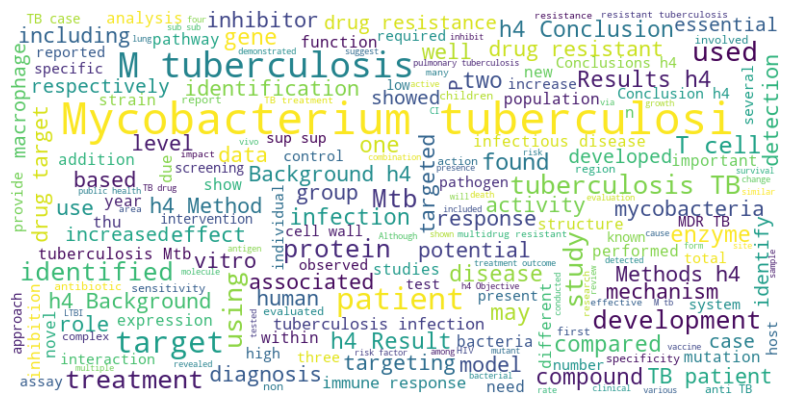

In [170]:
generate_wordcloud(tuberculosis_df.title_abstract)

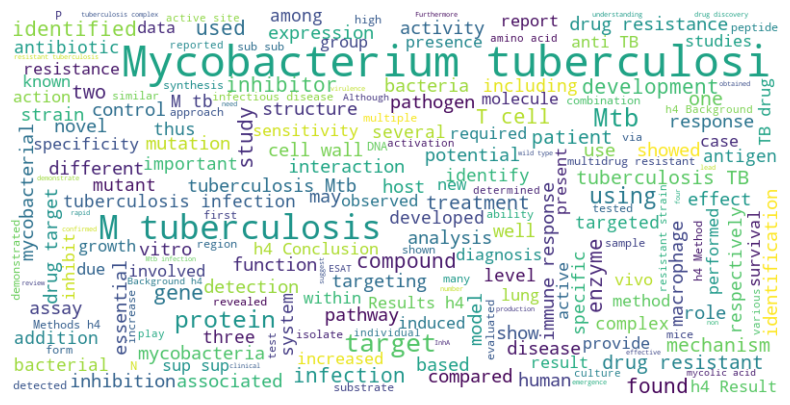

In [295]:
generate_wordcloud(mtb_df.title_abstract)

In [ ]:
generate_wordcloud(targets_df.title_abstract)